In [1]:
%pylab inline
import sys; sys.path.insert(0, "../")
import numpy as np
from ensemble_sampler import *

Populating the interactive namespace from numpy and matplotlib


### Example of sampling from an invariant distribution of SPDE  
Ref. Goodman & Weare, Ensemble Samplers With Affine Invariance  
A problem with this example is that it's harder to visualize, but from the experiments it does seem that pCN has more consistent performance in high dimensions (judging from acceptance probability).

In [2]:
def plot_traj(x):
    n, dim = x.shape
    for i in range(n):
        t = np.linspace(start=0.0, stop=1.0, num=dim)
        plt.plot(t, x[i, :])

In [3]:
dim = 50
nwalkers = 100
niters = 1000
t_dist = SPDE(N=dim)

Not using ensemble, use isotropic gaussian proposal with scale=0.2

In [4]:
dim = 50
proposal = PCNWalkMove(s=None, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
hist.acceptance_rate

0.052089999999999997

Use ensemble of size 3, scale=0.2.

In [5]:
dim = 50
proposal = PCNWalkMove(s=3, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print "acceptance_rate", hist.acceptance_rate

../ensemble_sampler/proposal/walk.py:64: RuntimeWarning: covariance is not positive-semidefinite.
  new_pos[i] = rand.multivariate_normal(walkers_to_move[i], scale**2 * cov)


acceptance_rate 0.45419


In [6]:
dim = 100
proposal = PCNWalkMove(s=3, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))

In [7]:
print "acceptance_rate", hist.acceptance_rate

acceptance_rate 0.29521


Ensemble with pCN, beta=0.2

In [8]:
dim = 50
proposal = PCNWalkMove(s=3, beta=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print "acceptance_rate", hist.acceptance_rate

../ensemble_sampler/proposal/walk.py:62: RuntimeWarning: covariance is not positive-semidefinite.
  + beta * rand.multivariate_normal(np.zeros_like(walkers_to_move[i]), cov)


acceptance_rate 0.91019


In [9]:
dim = 100
proposal = PCNWalkMove(s=3, beta=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))

In [10]:
print "acceptance_rate", hist.acceptance_rate

acceptance_rate 0.88836


PCN without ensemble, beta=0.2

In [11]:
dim = 50
proposal = PCNWalkMove(s=None, beta=0.01)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
print "acceptance_rate", hist.acceptance_rate

acceptance_rate 0.57037


In [12]:
dim = 100
proposal = PCNWalkMove(s=None, beta=0.01)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))

In [13]:
print "acceptance_rate", hist.acceptance_rate

acceptance_rate 0.53677


In [14]:
x = hist.get_flat("chain")[np.random.choice(100000, 1)]

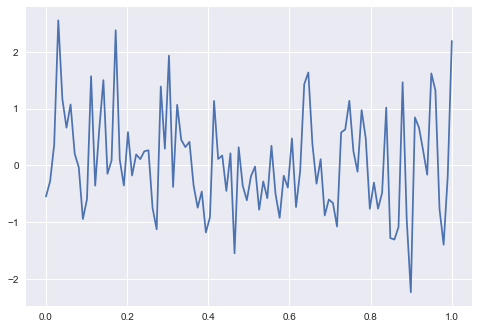

In [15]:
plot_traj(x)